## Contents
* Direct paths to-fro home and rewardport
* Finding nodes equivalent to nodes based on number of steps remembered (WIP)


In [2]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = '../src' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from collections import defaultdict

In [4]:
from parameters import *

In [6]:
outdata_path = '../outdata/'

In [8]:
# List number of bouts for each animal
print('mouse  bouts')
to=0
max_bouts = 0
for nickname in AllNames:
    tf = LoadTrajFromPath(outdata_path + nickname+'-tf')
    print(nickname+'     ',len(tf.no))
    
    if len(tf.no) > max_bouts:
        max_bouts = len(tf.no)
        
    to+=len(tf.no)
print('Total  ',to)

mouse  bouts
B1      104
B2      166
B3      147
B4      238
C1      173
C3      339
C6      150
C7      135
C8      164
C9      127
B5      245
B6      223
B7      204
D3      245
D4      319
D5      180
D6      59
D7      150
D8      109
D9      102
Total   3579


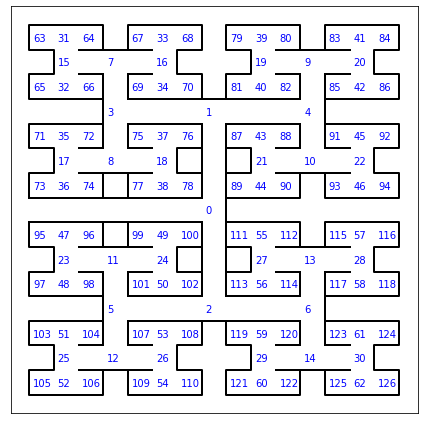

In [6]:
# Draw maze with node numbers
ma=NewMaze(6)
PlotMazeNodes(ma,figsize=6)

In [7]:
# define node numbers of all nodes
lv6_nodes = list(range(63,127))
lv5_nodes = list(range(31,63))
lv4_nodes = list(range(15,31))
lv3_nodes = list(range(7,15))
lv2_nodes = list(range(3,7))
lv1_nodes = list(range(1,3))
lv0_nodes = list(range(0,1))
lvl_dict = {0:lv0_nodes, 1:lv1_nodes, 2:lv2_nodes, 3:lv3_nodes, 4:lv4_nodes, 5:lv5_nodes, 6:lv6_nodes}

In [8]:
# inverse-define node numbers of all nodes mapped to depth
inv_lvl_dict = {n: level for level, nodes in lvl_dict.items() for n in nodes}
inv_lvl_dict[127] = -1   # home

In [9]:
# nodes in different quadrants
quads = [3,4,5,6]
sub_quads = {}
for q in quads:
    sub_quads[q] = []

    sub_quads[q].append(q)
    counter = 0
    while counter < len(sub_quads[q]):
        i = sub_quads[q][counter]
        m, n = 2*i+1, 2*i+2
        if m <= 126:
            sub_quads[q].append(m)
        if n <= 126:
            sub_quads[q].append(n)
        counter += 1

In [12]:
print(sub_quads[3])

[3, 7, 8, 15, 16, 17, 18, 31, 32, 33, 34, 35, 36, 37, 38, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]


#### Count number of direct paths from reward port to home and home to reward port.
##### Since the location of home is not clear, use the center point (node 0) as a proxy for home.

In [13]:
reward_to_home_direct_path = [116, 57, 28, 13, 6, 2, 0]
home_to_reward_direct_path = reward_to_home_direct_path[::-1]

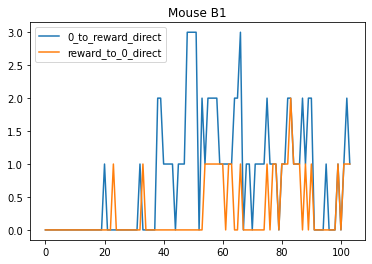

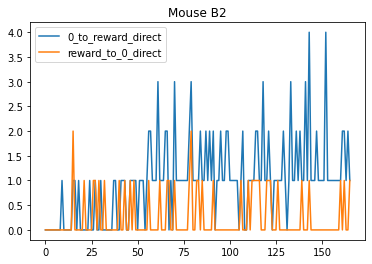

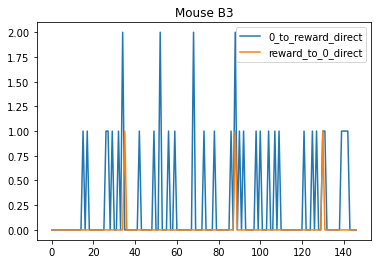

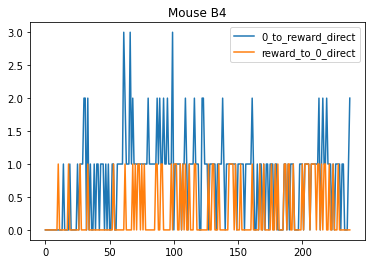

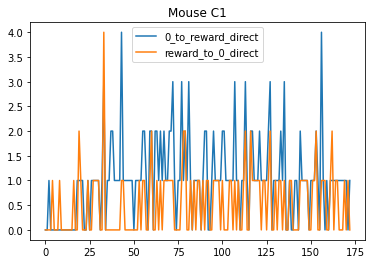

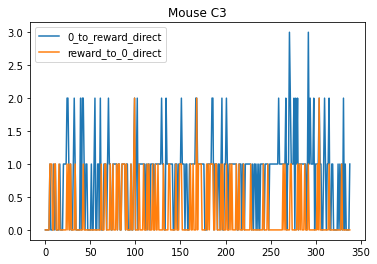

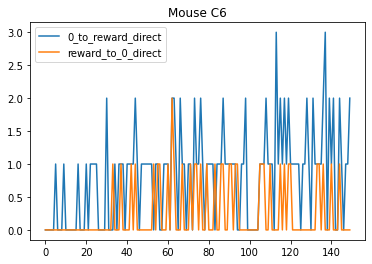

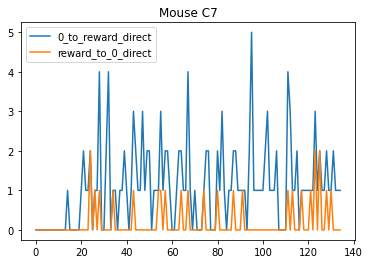

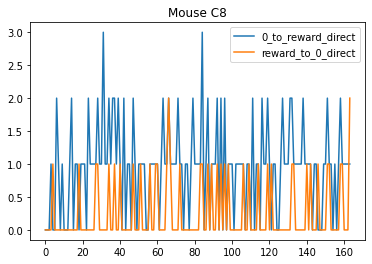

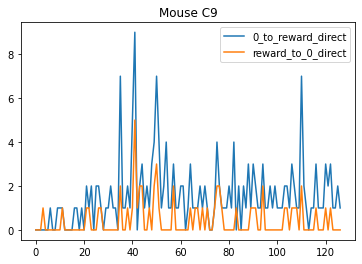

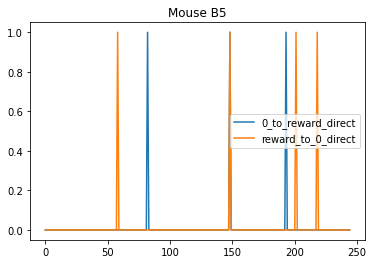

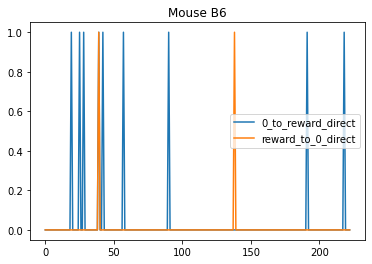

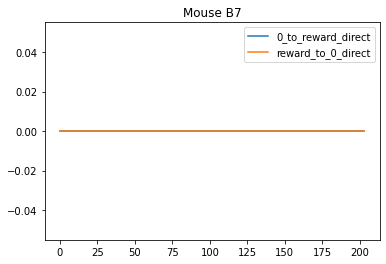

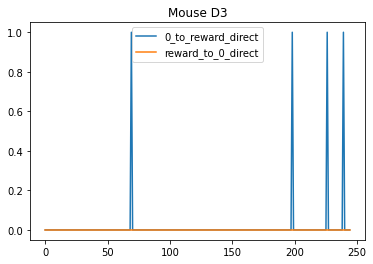

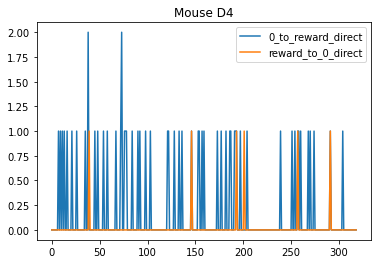

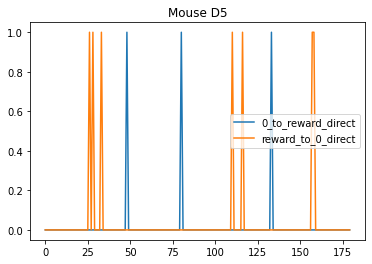

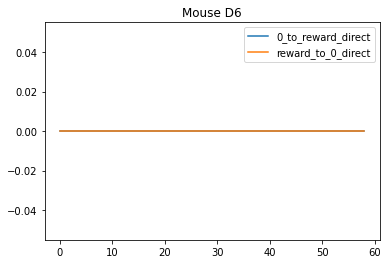

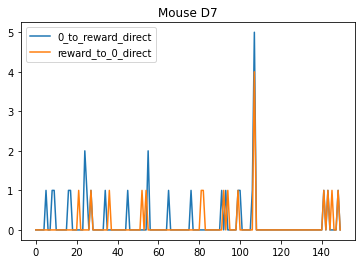

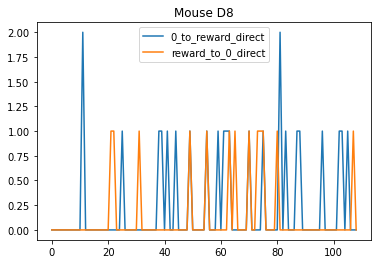

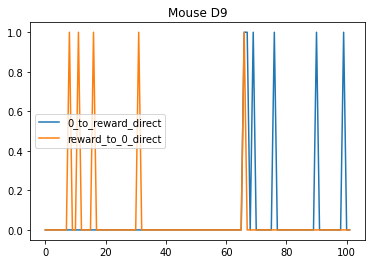

In [113]:
direct_path_all_mouse = []
for nickname in AllNames:
    tf = LoadTraj(nickname+'-tf')

    reward_to_home_direct_path_count_array = []
    home_to_rwd_direct_path_count_array = []

    for i, bout in enumerate(tf.no):
        rwd_to_home_direct_path_count, home_to_rwd_direct_path_count = 0, 0

        for j in range(len(bout)):
            path = [node for node, frame in bout[j:j+7]]
            if path == home_to_reward_direct_path:
#                 print(f"Bout {i} home_to_reward_direct_path {j}: {path}")
                home_to_rwd_direct_path_count += 1
            elif path == reward_to_home_direct_path:
#                 print(f"Bout {i} reward_to_home_direct_path {j}: {path}")
                rwd_to_home_direct_path_count += 1
        home_to_rwd_direct_path_count_array.append(home_to_rwd_direct_path_count)
        reward_to_home_direct_path_count_array.append(rwd_to_home_direct_path_count)

#     print(reward_to_home_direct_path_count_array)
#     print(home_to_rwd_direct_path_count_array)

    direct_path_all_mouse.append(
        [sum(home_to_rwd_direct_path_count_array), sum(reward_to_home_direct_path_count_array)]
    )

    plt.plot(home_to_rwd_direct_path_count_array, label='0_to_reward_direct')
    plt.plot(reward_to_home_direct_path_count_array, label='reward_to_0_direct')
    plt.title(f"Mouse {nickname}")
    plt.legend()
    plt.show()

In [107]:
direct_path_all_mouse

[[81, 29],
 [163, 39],
 [37, 3],
 [191, 64],
 [177, 92],
 [268, 83],
 [122, 37],
 [146, 25],
 [155, 41],
 [196, 56],
 [3, 4],
 [9, 2],
 [0, 0],
 [4, 0],
 [57, 6],
 [3, 7],
 [0, 0],
 [28, 18],
 [24, 13],
 [6, 5]]

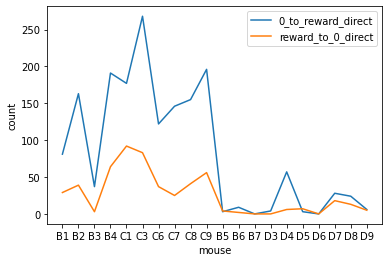

In [117]:
direct_path_all_mouse = np.array(direct_path_all_mouse)
plt.plot(direct_path_all_mouse[:, 0], label='0_to_reward_direct')
plt.plot(direct_path_all_mouse[:, 1], label='reward_to_0_direct')
plt.xticks(ticks=np.arange(0,20), labels=AllNames)
plt.ylabel('count')
plt.xlabel('mouse')
plt.legend()
plt.show()

##### Seems like there's indeed a difference in rewarded animals vs unrewarded.

#### Visiting other nodes equivalent to reward port

In [ ]:
def decision_nodes_path(last_n):
    rew_path = 'rllrlr'
    pa
    last_node = path[-1]
    if 'r':
        last_node = last_node*2+1
    else 'l':
        last_node = last_node*2-1
   

In [22]:
def count_visit_to_nodes(control_nodes):
    futile_visits = []
    control_nodes.append(RWD_NODE)
    for nickname in RewNames:
        tf = LoadTraj(nickname+'-tf')
        plot_array = []
        for i, bout in enumerate(tf.no):
            path = np.array([node for node, _ in bout])
            reward_count = len(tf.re[i])
            counts = []
            for control_node in control_nodes:
                count = np.count_nonzero(path == control_node)
                if control_node == RWD_NODE:
                    count -= reward_count
                counts.append(count)
            if counts:
                plot_array.append(counts)
        sums = np.sum(np.array(plot_array), axis=0)
        futile_visits.append(sums)

    futile_visits = np.array(futile_visits)
    plt.plot(futile_visits)
    plt.legend(control_nodes[:-1] + ['Reward'])
    plt.xticks(ticks=np.arange(0,10), labels=RewNames)
    plt.show()
    return

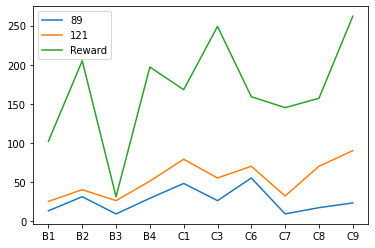

In [24]:
# 89 and 121
count_visit_to_nodes([89, 121])

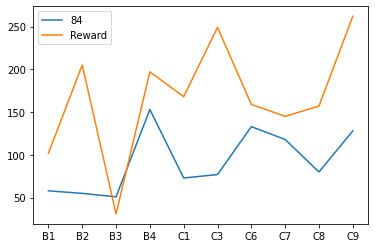

In [25]:
count_visit_to_nodes([84])

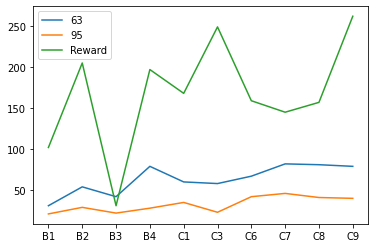

In [161]:
count_visit_to_nodes([63, 95])

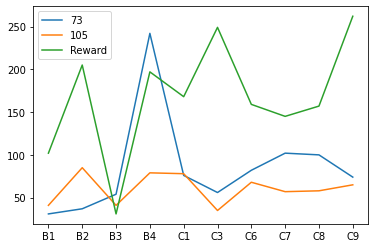

In [26]:
count_visit_to_nodes([73, 105])

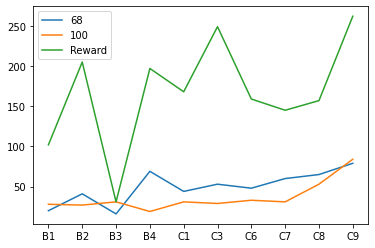

In [165]:
count_visit_to_nodes([68, 100])

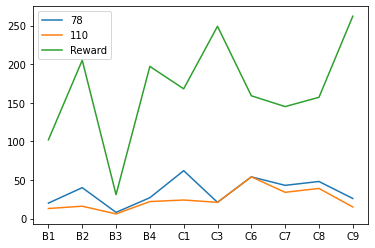

In [166]:
count_visit_to_nodes([78, 110])

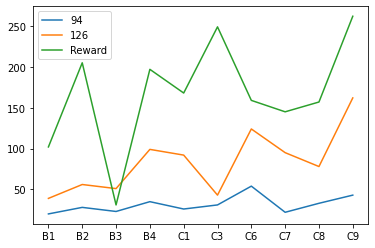

In [27]:
count_visit_to_nodes([94, 126])